# EART 70013  <a class="tocSkip">
    
# Applied Inversion Methods <a class="tocSkip">    
    
## Lecture 2 - Homework Solutions <a class="tocSkip">  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Optimisation---simple-example" data-toc-modified-id="Homework---Optimisation---simple-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Optimisation - simple example</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---$2\times-2$-linear-systems" data-toc-modified-id="Homework---$2\times-2$-linear-systems-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - $2\times 2$ linear systems</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Using-row-operations-to-solve-the-linear-system-and-find-the-inverse-matrix" data-toc-modified-id="Homework---Using-row-operations-to-solve-the-linear-system-and-find-the-inverse-matrix-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Using row operations to solve the linear system and find the inverse matrix</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Formula-for-the-inverse-of-a-$2\times-2$-matrix-using-row-operations" data-toc-modified-id="Homework---Formula-for-the-inverse-of-a-$2\times-2$-matrix-using-row-operations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Formula for the inverse of a $2\times 2$ matrix using row operations</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework----Calculating-the-rank-and-the-null-space" data-toc-modified-id="Homework----Calculating-the-rank-and-the-null-space-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework -  Calculating the rank and the null space</a></span><ul class="toc-item"><li><span><a href="#A-worked-example---please-read-through" data-toc-modified-id="A-worked-example---please-read-through-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>A worked example - please read through</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si
from mpl_toolkits.mplot3d import Axes3D

# Homework

## Homework - Optimisation - simple example

Consider the problem from the lecture
$$ 
f(\boldsymbol{x}) = 
1+2x + 4y + x^2+2xy+3y^2
$$

Compute the gradient vector, and by setting it equal to zero and writing as a matrix equation,
solve for the stationary point. 

Plot the function via a contour plot in 2D, and add the stationay point you've computed to verify it is indeed a minima (refer to the image from the lecture).

### Solution 

The gradient vector is

$$\nabla f= 
\begin{pmatrix}
2 + 2x + 2y\\
4 + 2x + 6y
\end{pmatrix}
$$

We can write this as a linear system:

$$
\nabla f = \begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
+
\begin{pmatrix}
2\\
4
\end{pmatrix}
$$

So $\nabla f = 0$ when 

$$
\begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
=
\begin{pmatrix}
-2\\
-4
\end{pmatrix}
$$

Let's use a contour plot to visualise the function in 2D, solve for the minimum (the stationary point) and plot it:

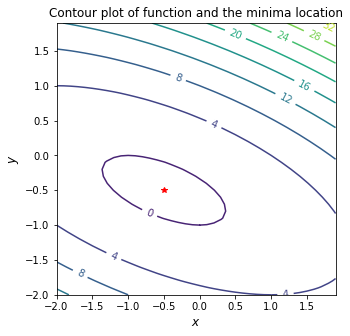

In [2]:
dx = 0.1
x = np.arange(-2.0, 2.0, dx)
y = np.arange(-2.0, 2.0, dx)
X, Y = np.meshgrid(x, y)
f = 1. + 2.*X + 4.*Y + X**2 + 2.*X*Y + 3.*Y**2 

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

cs = ax1.contour(X, Y, f, 10)
ax1.clabel(cs, inline=1, fontsize=10)
ax1.set_title('Contour plot of function and the minima location')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)

# solve the linear system for x,y
A = np.array([[2,2],[2,6]])
b = np.array([-2,-4])
x = sl.solve(A,b)
ax1.plot(x[0],x[1],'r*')
#plt.savefig('simple_optimisation.png')

## Homework - $2\times 2$ linear systems

Recall from the lecture the system

\begin{eqnarray*}
  2x + 3y &=& 7 \\[5pt]
   x - 4y &=& 3,
\end{eqnarray*} 

and the following plot which demonstrated a unique solution.

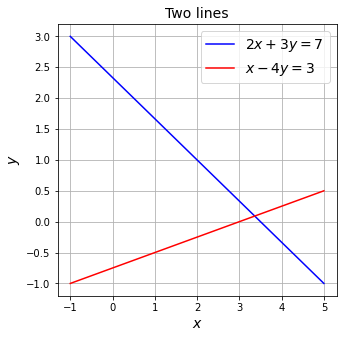

In [3]:
# unique solution
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')

ax1.legend(loc='best', fontsize=14);

You were asked in class what other situations are possible and to construct examples and the corresponding plots - try to come up with and plot these situations.

Hint: I used the following example as a starting point which was also discussed in the lecture

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

with a second RHS vector of 

$$
\left(
  \begin{array}{c}
    4 \\
    7
  \end{array}
\right)
$$

### Solution 

Consider the problem

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

where the matrix on the LHS clearly has a zero determinant.

Considering now the values in the RHS vector as well, the second equation is simply twice the first, and hence a solution to the first equation is also automatically a solution to the second equation. 

If we think geometrically, and interpret the two equations as constraints, they are **both** constraining our $x,y$ values to the same 1D subspace - any solution along this line in 2D satisfies **both** equations, and hence any of them is a solution to our linear system.

We hence only have one *linearly-independent* equation here, and our problem is under-constrained: we effectively only have one equation for two unknowns and this problem has *infinitely many* possibly solutions (or said another way, we have *existence*, but *non-uniqueness*): e.g. $\boldsymbol{x}=(2,0)^T$ is a solution, so is $\boldsymbol{x}=(-1,2)^T$, etc.


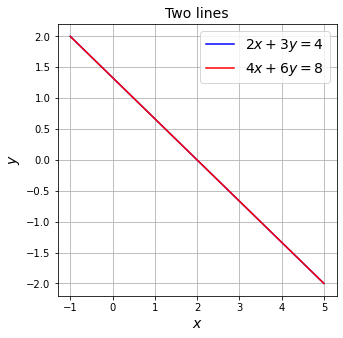

In [4]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (8./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=8$')

ax1.legend(loc='best', fontsize=14);

The following are all true, but not all equivalent statements:

1. The lines now intersect at infinitely many points - not at all points in 2D, but along a 1D subspace embedded within 2D.

2. We therefore have a continuous family of $(x,y)$ pairs of values that satisfy both equations simultaneously.

3. The linear/matrix system has infinitely many solutions (our previous *no solution existence* situation has become a *non-uniqueness* situation).

4. The corresponding matrix has zero determinant.

5. The matrix has no inverse.

Let's check point 4:


In [5]:
A = np.array([[2,3],[4,6]])
print('The determinant is: ',sl.det(A))
print('This is effectively zero:',np.allclose(0,sl.det(A)))

The determinant is:  -6.661338147750939e-16
This is effectively zero: True


Any pair of values that satisfies 

$$x = (4-3y)/2$$

is an exact solution.  Typically we will write solutions of this type in the form  

\begin{align*}
x &= (4-3\alpha)/2\\
y &= \alpha
\end{align*}

where $\alpha$ is an arbitrary constant.

If we instead replaced the RHS vector with $(4,7)^T$, then the two equations would now be contradictory: in this case we have *no solutions* (or *non-existence*).

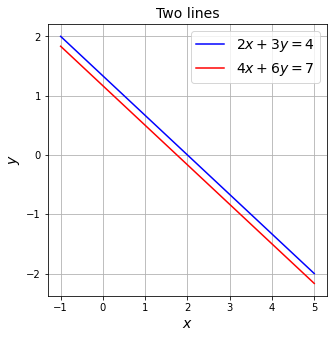

In [6]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (7./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=7$')

ax1.legend(loc='best', fontsize=14);

For this case some of our previous statements will still hold (as the LHS matrix is unchanged), but some will change (as the RHS vector is different):


1. The lines do not intersect at any point.

2. No single $(x,y)$ pair of values can satisfy both equations simultaneously.

3. The linear/matrix system has no solution (we are in a *no solution existence* situation).

4. The corresponding matrix has zero determinant.

5. The matrix has no inverse.


So 4 and 5 haven't changed, but the change in RHS vector has changed 1,2,3 dramatically.


To summarise, other than cases with a unique solution, 2D linear systems can also have no solutions or infinitely many solutions. If we want existence **AND** uniqueness of solution of course both scenarios aren't good!

## Homework - Using row operations to solve the linear system and find the inverse matrix

Consider the linear system

$$
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}   
$$

  
form the augmented matrix  $[A|\boldsymbol{b}|I]$ and perform row operations to obtain $[I|\boldsymbol{x}|A^{-1}]$.

### Solution

We can perform these operations in a way that is easy to keep track of by forming the augmented matrix (we add the RHS vector as an additional column). 

In this demonstration where we also want to form the inverse matrix let's additionally add columns corresponding to the inverse matrix. 

The notation above the arrows should hopefully be clear, it's encoding the operations we are performing on the rows, with '(1)' and '(2)' identifying the first and second row, respectively. '$(1)\leftarrow (1)-2(2)$' means replace the first row with the first row minus twice the second row - the operation we performed above.

When we perform these operations on the rows of the matrix $A$, we also apply them to the additional columns in our augmented matrix:

\begin{align*}
[A \, | \, \boldsymbol{b} \, | \, I] = 
&\left[
  \begin{array}{cc|c|cc}
    2 & 3 & 7 & 1 & 0 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)-2(2)}
\left[
  \begin{array}{cc|c|cc}
    0 & 11 & 1 & 1 & -2 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)/11}
\left[
  \begin{array}{cc|c|cc}
    0 & 1 & 1/11 & 1/11 & -2/11 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]\\
&\xrightarrow{(2)\leftarrow (2)+4(1)}
\left[
  \begin{array}{cc|c|cc}
    0 & 1 & 1/11 & 1/11 & -2/11 \\
    1 & 0 & 3+4/11 & 4/11 & 1-8/11  
  \end{array}
\right]
\xrightarrow{(1)\leftrightarrow (2)}
\left[
  \begin{array}{cc|c|cc}
    1 & 0 & 3+4/11 & 4/11 & 1-8/11  \\
    0 & 1 & 1/11 & 1/11 & -2/11 
  \end{array}
\right]
\end{align*}

Now the fact that we have transformed $A$ into $I$ via these so-called *row operations* means that what was originally in the $\boldsymbol{b}$ position is now the solution $\boldsymbol{x}$, and what was originally $I$ is now $A^{-1}$:

$$\boldsymbol{x} =
\begin{pmatrix}
3+4/11\\
1/11
\end{pmatrix}=
\begin{pmatrix}
37/11\\
1/11
\end{pmatrix},\qquad
A^{-1} = 
\begin{pmatrix}
    4/11 & 1-8/11  \\
    1/11 & -2/11 
\end{pmatrix}= 
\begin{pmatrix}
    4/11 & 3/11  \\
    1/11 & -2/11 
\end{pmatrix}= \frac{-1}{11}
\begin{pmatrix}
    -4 & -3  \\
    -1 & 2 
\end{pmatrix}
$$


We can check this answer against our expression for the inverse of a $2\times 2$ linear system.


## Homework - Formula for the inverse of a $2\times 2$ matrix using row operations

Starting from the augmented matrix

$$
[A \, | \, I] = 
\left[
  \begin{array}{rr|rr}
    a & b & 1 & 0 \\
    c & d & 0 & 1  
  \end{array}
\right]
$$

use row operations to turn the matrix on the left into the identity matrix. Confirm that the matrix you obtain on the right is equivalent to the general formula for the inverse matrix.
   

### Solution 

\begin{align*}
[A \, | \, I] = 
\left[
  \begin{array}{cc|cc}
    a & b & 1 & 0 \\
    c & d & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow c(1);\, (2)\leftarrow a(2)}
\left[
  \begin{array}{cc|cc}
    ca & cb & c & 0 \\
    ac & ad & 0 & a  
  \end{array}
\right]
\xrightarrow{(2)\leftarrow (2)-(1)}
\left[
  \begin{array}{cc|cc}
    ca & cb      & c  & 0 \\
    0  & ad - bc & -c & a  
  \end{array}
\right]
\xrightarrow{(2)\leftarrow (2)/(ad-bc)}
\left[
  \begin{array}{cc|cc}
    ca & cb & c  & 0 \\
    0  & 1  & -c(ad-bc)  & a/(ad-bc)  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)-cb(2)}
\left[
  \begin{array}{cc|cc}
    ca & 0 & c + c^2b/(ad-bc)  & -acb/(ad-bc) \\
    0  & 1 & -c/(ad-bc) & a/(ad-bc)  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)/ca}
\left[
  \begin{array}{cc|cc}
    1 & 0 & 1/a + cb/(a(ad-bc))  & -b/(ad-bc) \\
    0  & 1 & -c/(ad-bc) & a/(ad-bc)  
  \end{array}
\right]
\end{align*}

and finally note that 

$$ \frac{1}{a} + \frac{cb}{a(ad-bc)} = \frac{ad-bc + cb}{a(ad-bc)} = \frac{ad}{a(ad-bc)} = \frac{d}{ad-bc}$$

and so we are left with

$$A^{-1} =
\begin{pmatrix}
1/a + cb/(a(ad-bc))  & -b/(ad-bc) \\
-c/(ad-bc) & a/(ad-bc)  
\end{pmatrix} = 
\begin{pmatrix}
d/(ad-bc)  & -b/(ad-bc) \\
-c/(ad-bc) & a/(ad-bc)  
\end{pmatrix}
= 
\frac{1}{ad-bc}
\begin{pmatrix}
d  & -b \\
-c & a 
\end{pmatrix}
$$

as required.

Note of course that an early step in the derivation above involved dividing through by $ad-bc$, and therefore required that this quantity be non-zero. Of course we recognise this as the determinant of the matrix!

## Homework -  Calculating the rank and the null space

How can we compute the rank and the null-space for a given matrix?

We can do this using row operations.  

We already stated that row operations, when performed on the augmented matrix, results in an updated linear system with the same solution. We did this since the updated augmented system is constructed such that it is trivial to solve. 

It's also the case that performing row operations (on a matrix itself or the augmented system) does not change the rank of a matrix (or the augmented system).

Hence we can compute the rank of a matrix by performing row operations on it to transform it to the simpler (reduced) row echelon form.

We can then easily read off the rank of the transformed matrix as the number of linearly independent rows (equivalently the number of linearly independent columns), and this is also the rank of the matrix in its original form.


###  A worked example - please read through 


For example consider the following square matrix case

$$ A =
\begin{pmatrix}
-2 & -4 & -20 \\
2 & 6 & 24 \\
2 & 10 & 32
\end{pmatrix}
$$

Let's multiply the first row by -1/2 in order to generate a one in the first entry of the first row (we could choose to swap rows first, so of course there is no unique way to go about this process), this gives us

$$
\begin{pmatrix}
1 & 2 & 10 \\
2 & 6 & 24 \\
2 & 10 & 32
\end{pmatrix}
$$

Remove the entries below that "1" that's now in the top left by subtracting multiples of the first row from the second and third:

$$
\begin{pmatrix}
1 & 2 & 10 \\
0 & 2 & 4 \\
0 & 6 & 12
\end{pmatrix}
$$

Now turn the first entry in the second row into a "1"

$$
\begin{pmatrix}
1 & 2 & 10 \\
0 & 1 & 2 \\
0 & 6 & 12
\end{pmatrix}
$$

and remove the value below, as well as the value above, by subtracting the appropriate multiples of the second row from the first and the third:

$$
\begin{pmatrix}
1 & 0 & 6 \\
0 & 1 & 2 \\
0 & 0 & 0
\end{pmatrix}
$$

You can hopefully see that this has two linearly independent columns (we can easily see how the first two columns can be combined to form the third), 

it also has two linearly independent rows (as we expect). 

The rank of the matrix in this final form is thus 2, and therefore  $\text{rank}(A)=2$.

This means that the dimension of the range of $A$ is two, i.e. the range will span a plane within $\mathbb{R}^m = \mathbb{R}^3$.


We can check this using `numpy`:

In [7]:
# compute the rank of the matrix in original form
A = np.array([[-2, -4, -20], [2 , 6 , 24], [2, 10, 32]])
pprint(A)
print(np.linalg.matrix_rank(A))

# compute the rank of the matrix in a form after we've performed row operations
Arref = np.array([[1, 0, 6], [0 , 1 , 2], [0, 0, 0]])
pprint(Arref)
print(np.linalg.matrix_rank(Arref))

array([[ -2,  -4, -20],
       [  2,   6,  24],
       [  2,  10,  32]])
2
array([[1, 0, 6],
       [0, 1, 2],
       [0, 0, 0]])
2


Let's create a series of points in 3D space (equivalently vectors extending from the origin) and see how they transform under multiplication of $A$. If above is all correct the dimension of the mapped points/vectors whould be 2 - it should be a 2D plane in 3D.

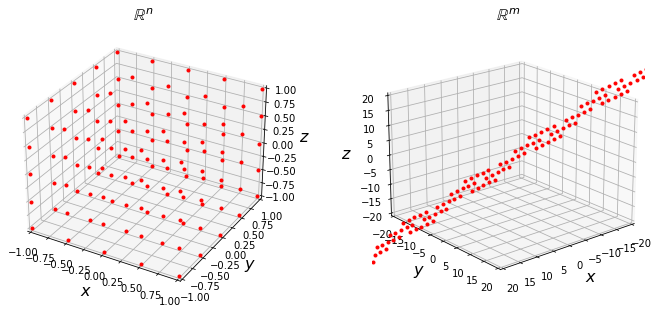

In [8]:
# let's plot the transformation

A = np.array([[-2, -4, -20], [2 , 6 , 24], [2, 10, 32]])

# construct some points in 3D space
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)
z = np.linspace(-1, 1, 5)
# this creates a mesh of points in 2D
xx, yy, zz = np.meshgrid(x, y, z)
# convert to row vectors
xxx = np.reshape(xx,(1,np.size(xx)))
yyy = np.reshape(yy,(1,np.size(yy)))
zzz = np.reshape(zz,(1,np.size(zz)))
# convert to a 3 x N matrix of vectors/points
vecs = np.vstack((xxx,yyy,zzz))

# transform these points
Avecs = A@vecs

# plot
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(vecs[0,:], vecs[1,:], vecs[2,:], 'r.')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('$\mathbb{R}^n$', fontsize = 16)
ax1.set_xlim3d(-1, 1)
ax1.set_ylim3d(-1, 1)
ax1.set_zlim3d(-1, 1)
                      
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(Avecs[0,:], Avecs[1,:], Avecs[2,:], 'r.')
ax2.set_xlabel('$x$', fontsize = 16)
ax2.set_ylabel('$y$', fontsize = 16)
ax2.set_zlabel('$z$', fontsize = 16)
ax2.set_title('$\mathbb{R}^m$', fontsize = 16)
ax2.set_xlim3d(-20, 20)
ax2.set_ylim3d(-20, 20)
ax2.set_zlim3d(-20, 20)

# rotate to try and get a better view - with a different plotting backend you could rotate with mouse
# you could edit this to try and get a better idea of the 3D view
ax2.view_init(20, 50)

Now let's see how we can compute the null space. 

Recall we said in the previous lecture that as row operations will never change the zero vector, we don't actually need to perform row operations on the augmented matrix $[A|\boldsymbol{b}]$ when $\boldsymbol{b}=\boldsymbol{0}$. So we can make use of the reduced row echelon form of $A$ we created above (call it  $A_{\text{RREF}}$). The solutions to $A\boldsymbol{b}=\boldsymbol{0}$ will be the solutions to $A_{\text{RREF}}\boldsymbol{b}=\boldsymbol{0}$.


$$
\begin{pmatrix}
1 & 0 & 6 \\
0 & 1 & 2 \\
0 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
0
\end{pmatrix}
\iff 
\left\{
\begin{align}
1x + 0y + 6z &= 0\\
0x + 1y + 2z &= 0\\
0x + 0y + 0z &= 0
\end{align}
\right.
$$

from which we can conclude that we actually have here two equations for three unknowns. 

Let's set $x = \alpha$, with $\alpha$ an arbitrary scalar. 

Then the first equation tells us that $z = -\alpha / 6$, and then the second that $y = \alpha / 3$. This will be a solution for any $\alpha$, and so in this example the dimension of the null space is 1 (and the dimension of the null space plus the rank is $n=3$ as expected).

For example, with one choice of the arbitrary $\alpha$ we get one vector from the null-space:

$$
\boldsymbol{x}
= 
\begin{pmatrix}
6 \\
2 \\
-1
\end{pmatrix}
$$


Can we do this in `numpy`, and check our solution against?

In [9]:
A = np.array([[-2, -4, -20], [2 , 6 , 24], [2, 10, 32]])
null_vecs = sl.null_space(A)
print(null_vecs)

# check that A@ these vectors yields the zero vector
print(A@null_vecs)

# is this the same as we obtained above - let's normalise it and multiply it by the length of the vector above
print((sl.null_space(A) / sl.norm(sl.null_space(A))) * sl.norm(np.array([6,2,-1])) )

[[-0.93704257]
 [-0.31234752]
 [ 0.15617376]]
[[ 2.22044605e-15]
 [-1.33226763e-15]
 [-8.88178420e-16]]
[[-6.]
 [-2.]
 [ 1.]]


Of course we can always multiply the vectors in the null space by -1 (or indeed any constant) and it is still a member of the null space.